# Частина перша: Знайомство з Pandas

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [104]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України ", decimal=",", thousands=".")[0]

## Вивести перші рядки таблиці за допомогою методу `head`

In [105]:
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


## Визначте кількість рядків та стовпців у датафреймі (атрибут `shape`)

In [106]:
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість стовпців: {df.shape[1]}")

Кількість рядків: 28
Кількість стовпців: 9


## Замініть у таблиці значення "—" на значення NaN

In [107]:
df.replace("—", np.nan, inplace=True)
print(df.head(5))

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


## Визначте типи всіх стовпців за допомогою `dataframe.dtypes`

In [108]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


## Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [109]:
non_numeric_cols = list(df.columns[df.isnull().any()])
non_numeric_cols = non_numeric_cols[1:]

for col in non_numeric_cols:
    df[col] = df[col].astype(float)

print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


## Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` та `sum`)

In [110]:
missing_value_fraction = df.isnull().sum() / len(df) * 100
print("частка пропусків в кожній колонці, %:")
print(missing_value_fraction.round(2))

частка пропусків в кожній колонці, %:
Регіон     0.00
1950       7.14
1960       3.57
1970       3.57
1990       0.00
2000       0.00
2012       0.00
2014       7.14
2019      14.29
dtype: float64


## Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [111]:
df = df.iloc[:-1]
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

## Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод `fillna`)

In [112]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True, axis=0)

print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

## Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [113]:

avg_2019 = df['2019'].mean()
print("Середній рівень народжуваності у 2019 році:", avg_2019, "\n")

regions_above_avg= df.loc[df['2019'] > avg_2019]

print(regions_above_avg)

Середній рівень народжуваності у 2019 році: 8.014814814814814 

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
14            Одеська  24.1  19.2  14.8  12.6   8.0  12.7  12.3   8.8
16         Рівненська  26.9  26.7  19.3  15.8  11.8  15.9  14.8  10.7
20         Херсонська  20.8  21.4  16.6  14.3   8.5  11.7  11.5   8.1
23        Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
25               Київ  23.1  17.4  15.9  12.0   7.3  12.0  12.1  11.0


## У якому регіоні була найвища народжуваність у 2014 році?

In [114]:
max_2014 = df['2014'].max()
region_max = df[df['2014'] == max_2014]
print(region_max['Регіон'])

16    Рівненська
Name: Регіон, dtype: object


## Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

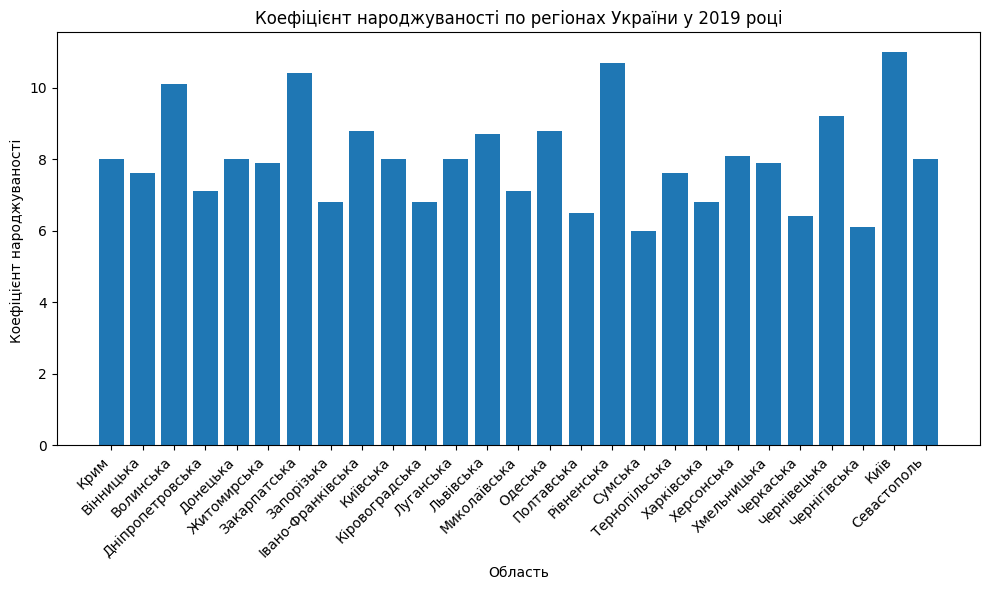

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(df["Регіон"], df["2019"])
plt.xlabel("Область")
plt.ylabel("Коефіцієнт народжуваності ")
plt.title("Коефіцієнт народжуваності по регіонах України у 2019 році")
# plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()